In [32]:
from SALib.sample import saltelli
import numpy as np
import pickle
from tqdm.auto import tqdm
import time
import sys
import lzma
import os


import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [15]:
import cpt_optimisation

# Saltelli Sampling

In [16]:
# problem definition
PROBLEM = {
    "num_vars" : 6,
    "names"    : ["theta",
                  "gain_right",
                  "saving_prop",
                  "prob_left",
                  "alpha",
                  "assistance"],
    "bounds"   : [[0.01, 0.20],
                  [1.70, 8.00],
                  [0.70, 0.80],
                  [0.30, 0.45],
                  [2.00, 12.0],
                  [0.05, 0.30]]
}

# generate Saltelli samples
NUM_SAMPLES = 1024
X_debt = saltelli.sample(PROBLEM, NUM_SAMPLES, calc_second_order=False)


# problem definition
PROBLEM = {
    "num_vars" : 5,
    "names"    : ["theta",
                  "gain_right",
                  "saving_prop",
                  "prob_left",
                  "alpha"],
    "bounds"   : [[0.01, 0.20],
                  [1.70, 8.00],
                  [0.70, 0.80],
                  [0.30, 0.45],
                  [2.00, 12.0]]
}

# generate Saltelli samples
NUM_SAMPLES = 1024
X_no_debt = saltelli.sample(PROBLEM, NUM_SAMPLES, calc_second_order=False)

/var/folders/bj/4q98hxqx4vq6wwm8qqllvxmr0000gn/T/ipykernel_67045/872814574.py:20: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  X_debt = saltelli.sample(PROBLEM, NUM_SAMPLES, calc_second_order=False)
/var/folders/bj/4q98hxqx4vq6wwm8qqllvxmr0000gn/T/ipykernel_67045/872814574.py:40: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  X_no_debt = saltelli.sample(PROBLEM, NUM_SAMPLES, calc_second_order=False)


In [17]:
def gini(x):
    mad = np.abs(np.subtract.outer(x, x)).mean()
    mean = np.mean(x)
    if mean==0:
        mean = 1
    rmad = mad/mean
    g = 0.5 * rmad
    return g

# Compute gini coefficients and proportion of agents richer at end of runs

In [ ]:
def get_phase_plot_data(reps, params, folder_path, setup, num_agents=1225):

    GINIS = np.zeros((reps, params))
    PROP_RICHER = np.zeros((reps, params))

    for f in os.listdir(folder_pather_path):
        if f.endswith("lzma"):
            data = pickle.load(lzma.open(f"{folder_path}/{f}"))
            seed = int(f.split("_")[0])
            g = np.zeros(params)
            prop = np.zeros(params)
            for i,row in tqdm(enumerate(data)):
                r = row.T
                g[i] = gini(r[-1])
                prop[i] = np.sum(r[-1]>r[0]) / num_agents
            GINIS[seed] = g
            PROP_RICHER[seed] = prop

    with open(f"phase_plots_{setup}.pickle", "wb") as f:
        pickle.dump({"gini":GINIS, "prop_richer":PROP_RICHER}, f)

In [300]:
REPS = 20
PARAMS = len(X_no_debt)
NUM_AGENTS = 1225

GINIS = np.zeros((REPS, PARAMS))
PROP_RICHER = np.zeros((REPS, PARAMS))

for f in os.listdir("../new_W_arrays/"):
    if f.endswith("lzma"):
        data = pickle.load(lzma.open(f"../new_W_arrays/{f}"))
        seed = int(f.split("_")[0])
        g = np.zeros(PARAMS)
        prop = np.zeros(PARAMS)
        for i,row in tqdm(enumerate(data)):
            r = row.T
            g[i] = gini(r[-1])
            prop[i] = np.sum(r[-1]>r[0]) / NUM_AGENTS
        GINIS[seed] = g
        PROP_RICHER[seed] = prop

with open("phase_plots_no_debt.pickle", "wb") as f:
    pickle.dump({"gini":GINIS, "prop_richer":PROP_RICHER}, f)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [315]:
param_names = ["theta", "gain_right", "saving_prop", "prob_left", "alpha"]

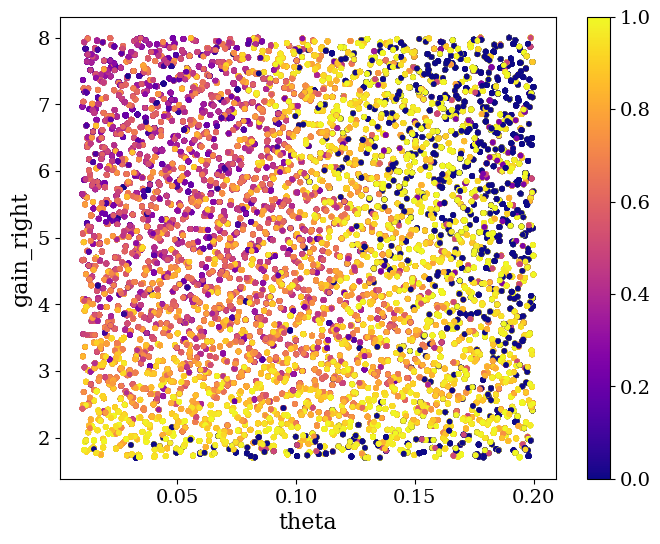

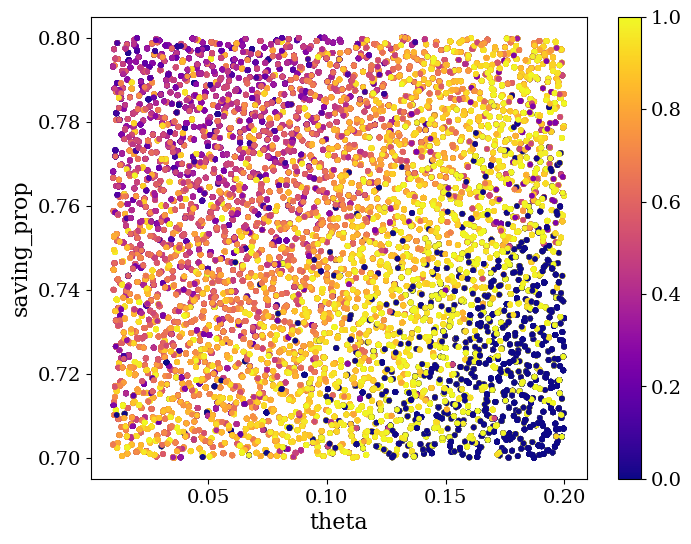

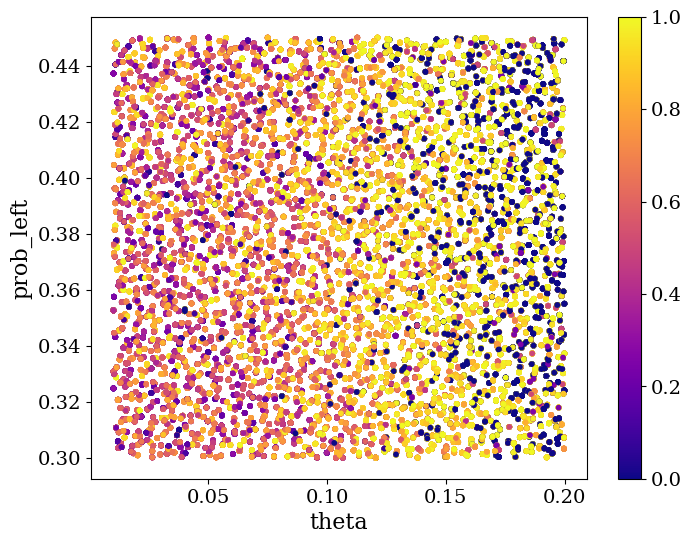

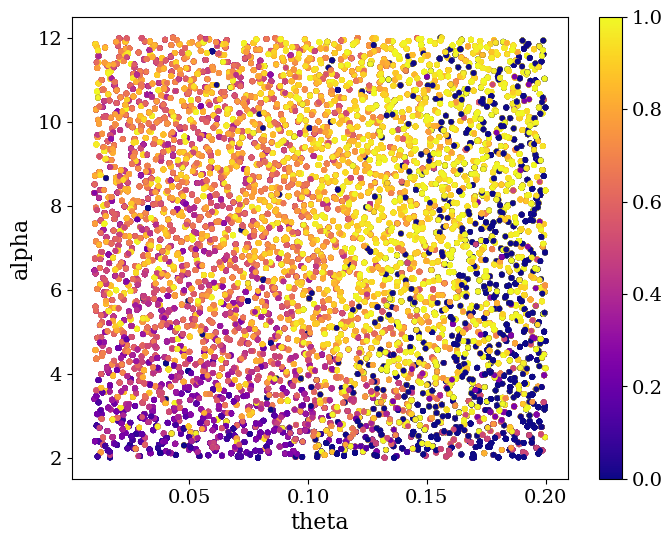

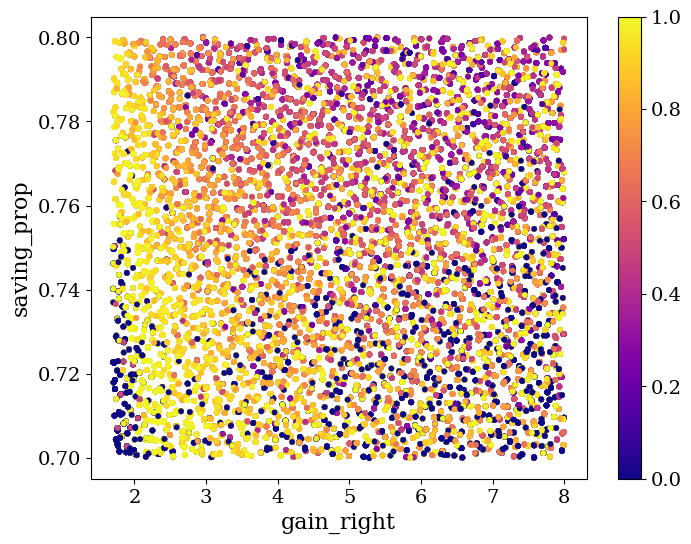

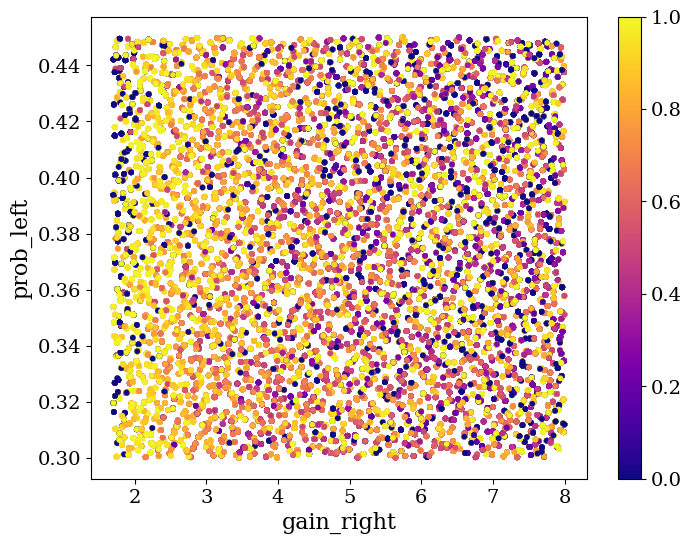

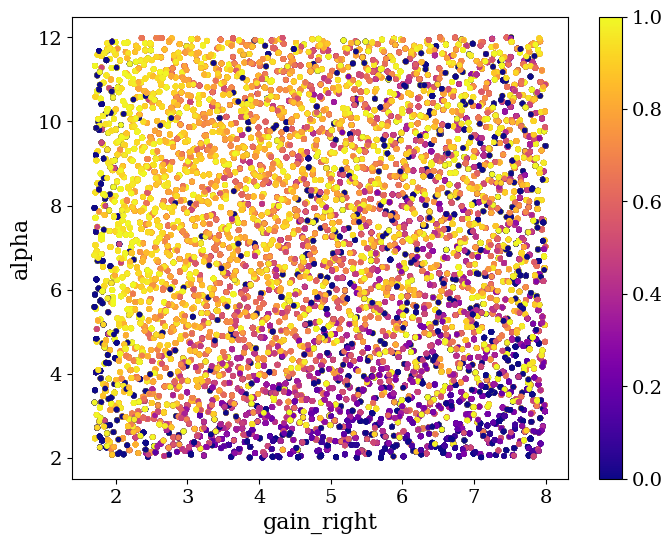

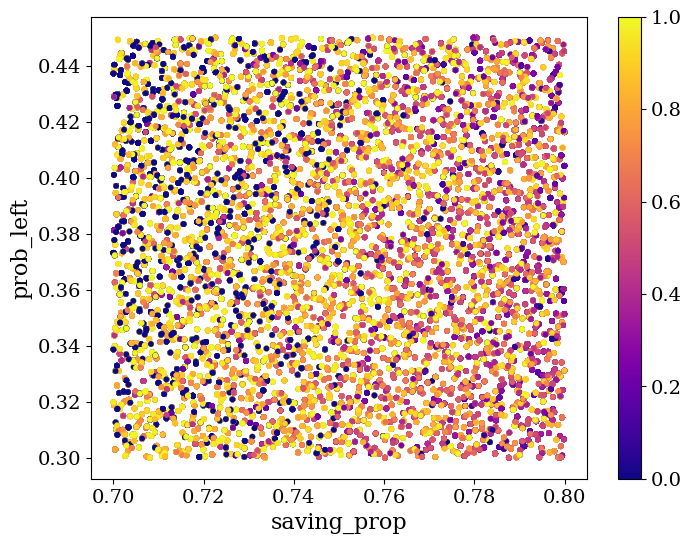

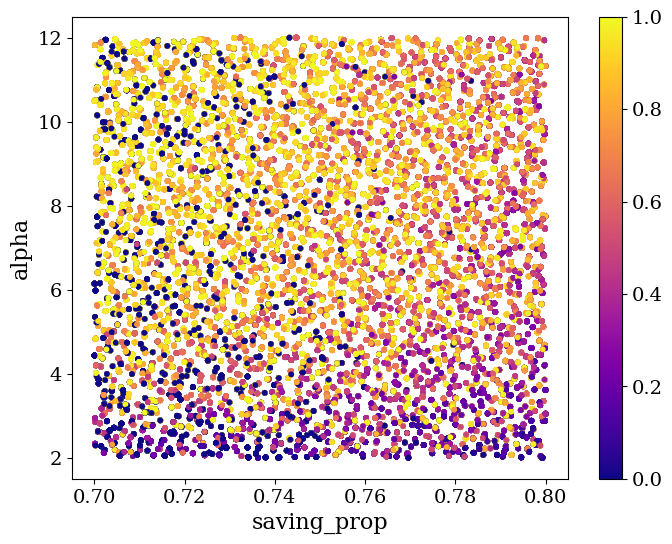

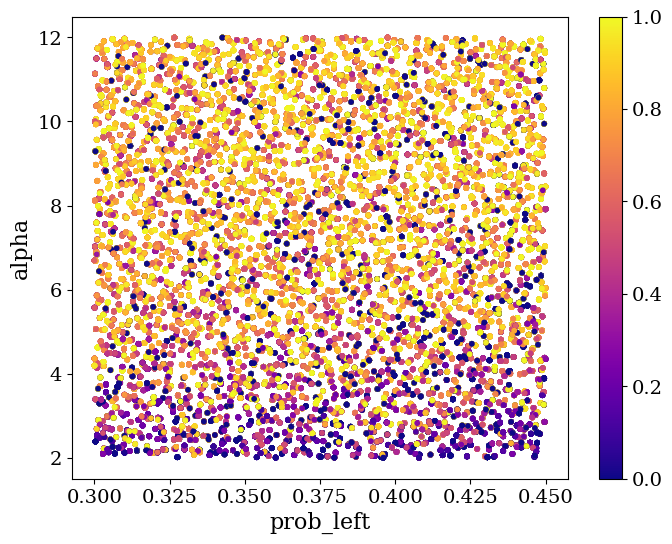

In [317]:
for i in range(len(param_names)):
    for j in range(i+1, len(param_names)):
        for row in GINIS:
            idx = np.where((row >= 0) & (row <= 1))[0]
            plt.scatter(X_no_debt[idx,i], X_no_debt[idx,j], s=10, c=row[idx], cmap="plasma")
        plt.colorbar()
        plt.xlabel(param_names[i])
        plt.ylabel(param_names[j])
        plt.grid()
        plt.show()

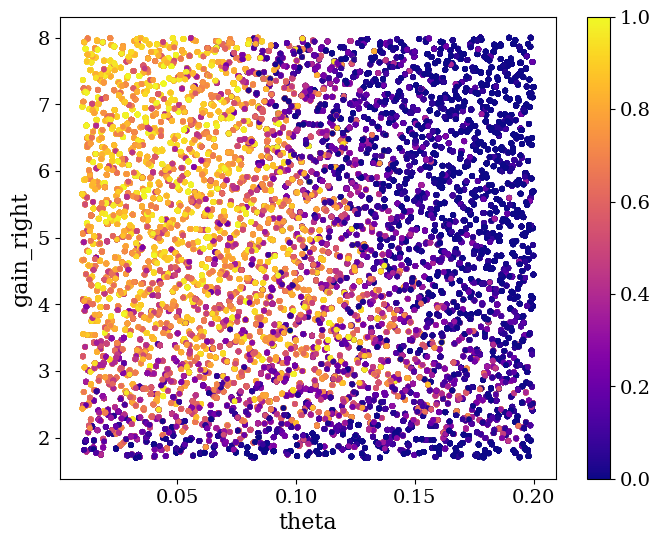

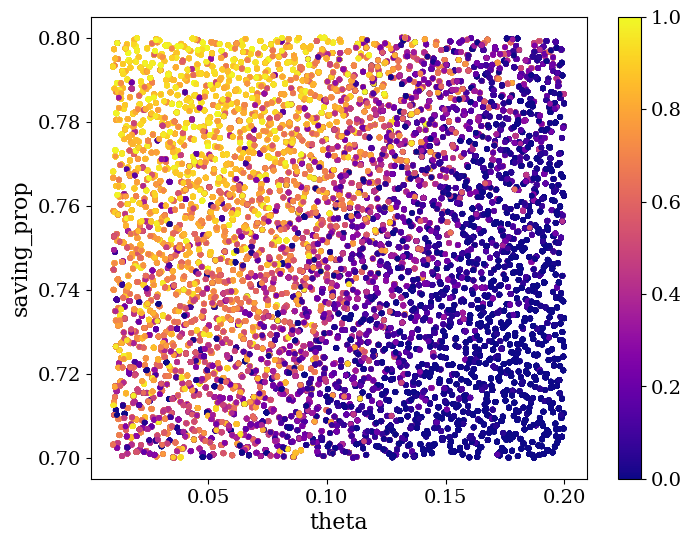

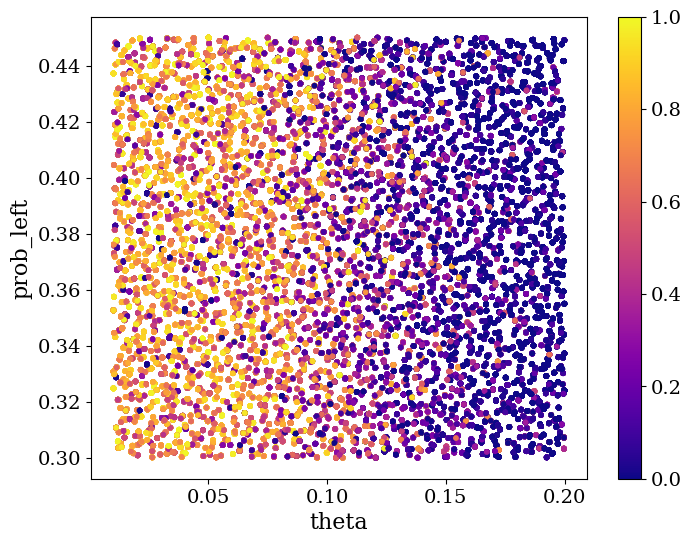

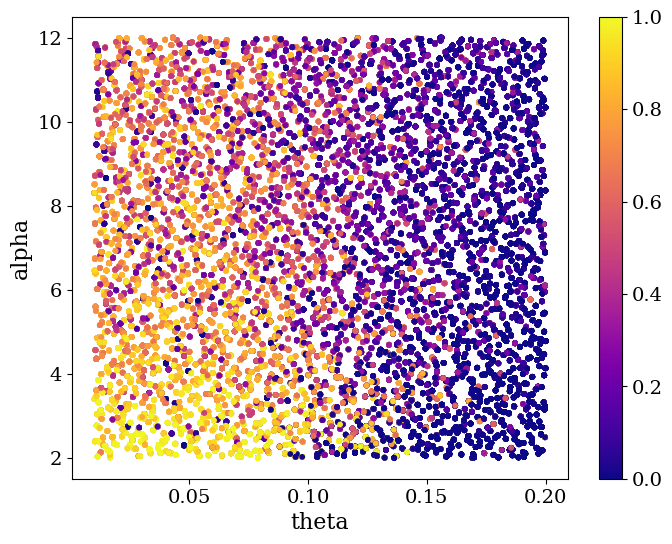

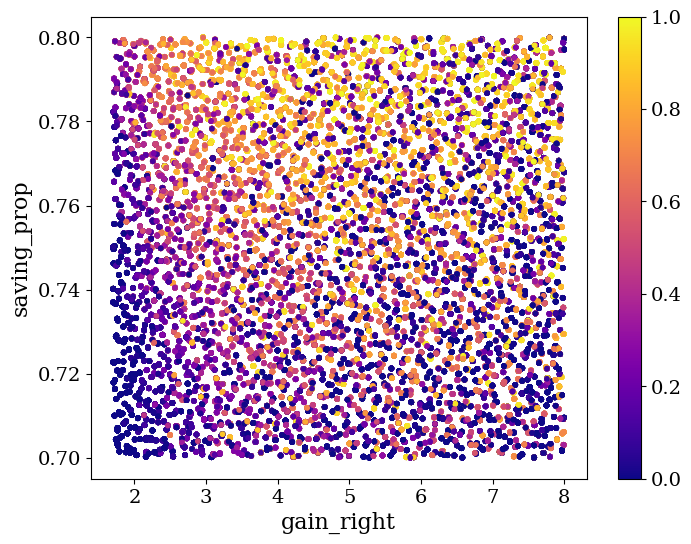

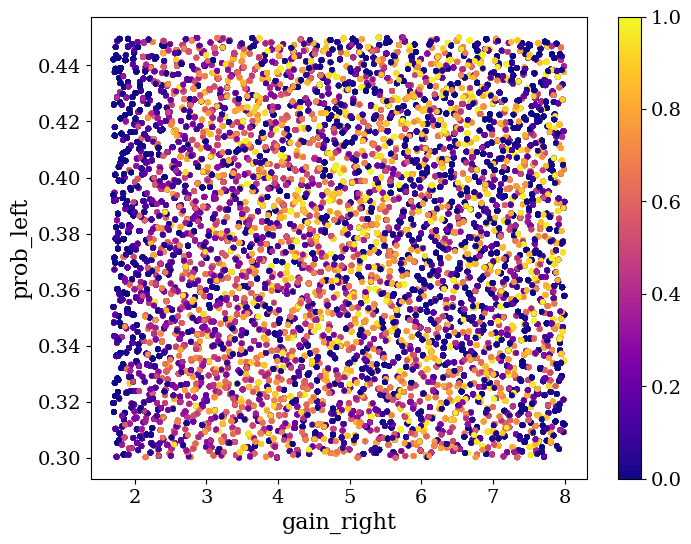

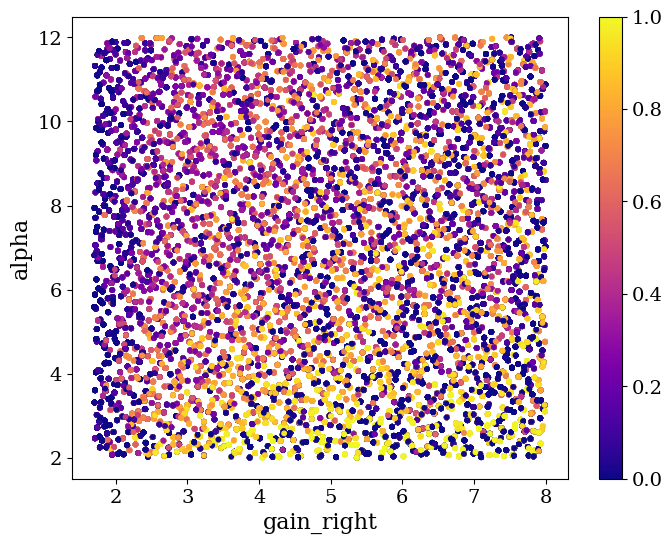

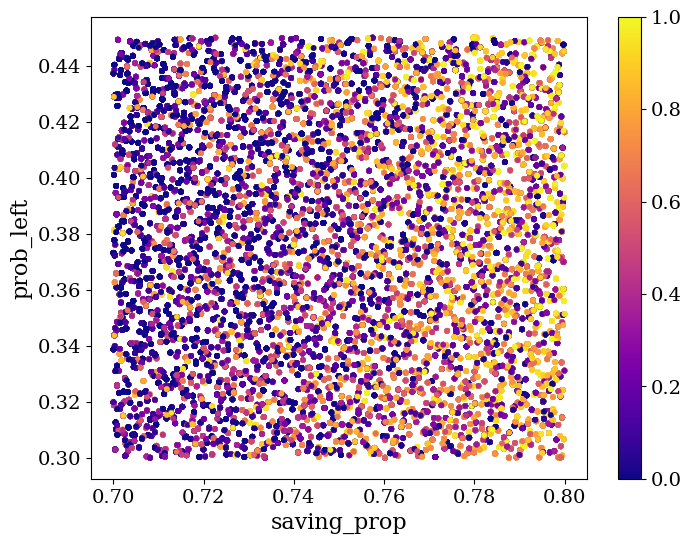

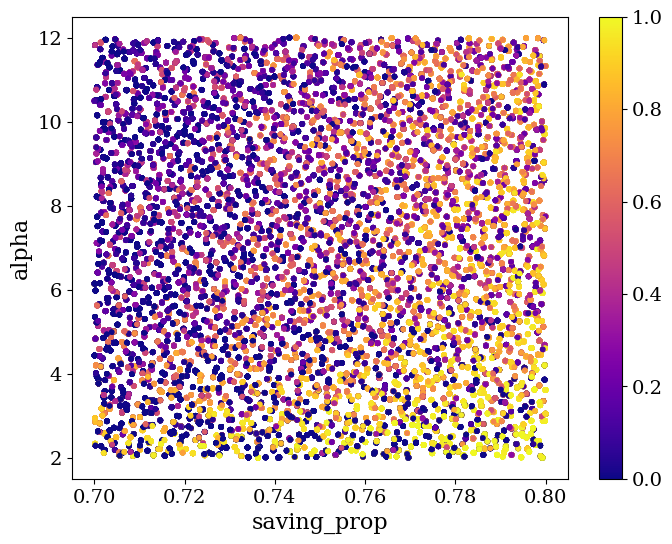

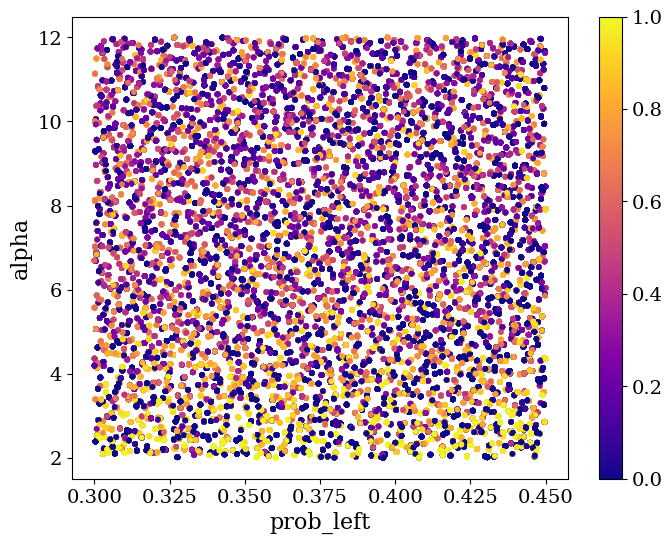

In [318]:
for i in range(len(param_names)):
    for j in range(i+1, len(param_names)):
        for row in PROP_RICHER:
            idx = np.where((row >= 0) & (row <= 1))[0]
            plt.scatter(X_no_debt[idx,i], X_no_debt[idx,j], s=10, c=row[idx], cmap="plasma")
        plt.colorbar()
        plt.xlabel(param_names[i])
        plt.ylabel(param_names[j])
        plt.grid()
        plt.show()